# Classifying Spam Emails Using Naive Bayes

## Problem Statement
 - The SAMS Spam collection is a set of SAMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according to being legitimate or spam.
 - The files contain one message per line. Each line is composed by two columns: v1 contains the label, v2 contains the raw test.


## Step #0: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Step #1: Load Dataset

In [2]:
spam_df = pd.read_csv('Data\\emails.csv')
spam_df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
spam_df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [5]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
text    5728 non-null object
spam    5728 non-null int64
dtypes: int64(1), object(1)
memory usage: 67.2+ KB


In [8]:
spam_df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

## Step #2: Visualize Dataset

In [9]:
ham = spam_df[spam_df['spam'] == 0]
spam = spam_df[spam_df['spam'] == 1]

In [12]:
ham.shape, spam.shape

((4360, 2), (1368, 2))

In [15]:
print("Spam Percentage = ", round(len(spam) / len(spam_df) * 100, 2), '%')
print("Ham Percentage = ", round(len(ham) / len(spam_df) * 100, 2), '%')

Spam Percentage =  23.88 %
Ham Percentage =  76.12 %


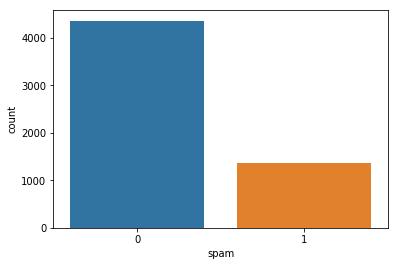

In [17]:
sns.countplot(spam_df['spam'], label='Count Spam vs. Ham');

## Step #3: Create Training and Testing Dataset / Data Cleaning

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
vec = CountVectorizer()
spam_vec = vec.fit_transform(spam_df['text'])

In [27]:
spam_vec.shape

(5728, 37303)

## Step #4: Train the Model

**First do training on all data, then we will test it on some of our own text**

In [30]:
label = spam_df['spam'].values

In [29]:
from sklearn.naive_bayes import MultinomialNB

In [31]:
nb_clf = MultinomialNB()
nb_clf.fit(spam_vec, label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [34]:
test_samp = ['Free money!!!', 'Hi Kim, Please let me know if you need any further information. Thanks']
test_samp_vec = vec.transform(test_samp)

In [35]:
nb_clf.predict(test_samp_vec)

array([1, 0], dtype=int64)

Worked on our given examples.

**Now split into train and test datasets and train model**

In [40]:
X = spam_vec
y = label

In [41]:
X.shape, y.shape

((5728, 37303), (5728,))

In [36]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=5)

In [43]:
from sklearn.naive_bayes import MultinomialNB

In [44]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Step #5: Evaluate the Model

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
nb_train_pred = nb_clf.predict(X_train)
nb_pred = nb_clf.predict(X_test)

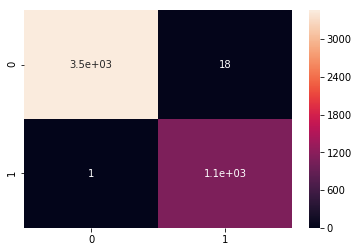

In [52]:
cm = confusion_matrix(y_train, nb_train_pred)
sns.heatmap(cm, annot=True);

In [55]:
print(classification_report(y_train, nb_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3475
           1       0.98      1.00      0.99      1107

   micro avg       1.00      1.00      1.00      4582
   macro avg       0.99      1.00      0.99      4582
weighted avg       1.00      1.00      1.00      4582



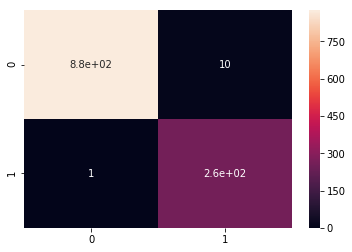

In [53]:
cm = confusion_matrix(y_test, nb_pred)
sns.heatmap(cm, annot=True);

In [57]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       885
           1       0.96      1.00      0.98       261

   micro avg       0.99      0.99      0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

